## Generating Tile Map Images

In [1]:
# helpful
# https://github.com/MatthewDaws/TileMapBase

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### Initialize tilemapbase Parameters

In [3]:
# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
import tilemapbase
tilemapbase.start_logging()

/opt/anaconda3/envs/datasci-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/envs/datasci-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/envs/datasci-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. Whe

In [6]:
# Don't need if you have run before; DB file will already exist.
tilemapbase.init(create=True)

In [7]:
# Use open street map
t = tilemapbase.tiles.build_OSM()

### Testing & Tweaking Parameters

In [8]:
# My location: Minneapolis / St. Paul (Twin Cities)
my_location = (-93.258133, 44.986656)

degree_range = 0.006
extent = tilemapbase.Extent.from_lonlat(my_location[0] - degree_range,
                                        my_location[0] + degree_range,
                                        my_location[1] - degree_range,
                                        my_location[1] + degree_range)
extent = extent.to_aspect(1.0)
extent

Extent((0.24093296388888888,0.3597607830951547)->(0.2409662972222222,0.359794116428488) projected as normal)

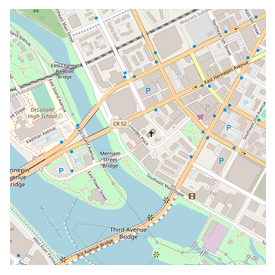

In [10]:
# Create images of 256x256 pixels, no image border or margin
fig, ax = plt.subplots(figsize=(256/100, 256/100), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis("off")

plotter = tilemapbase.Plotter(extent, t, zoom=16)
plotter.plot(ax, t)

fig.tight_layout(pad=0.01)

x, y = tilemapbase.project(*my_location)
# ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

In [166]:
# To save a test image...
# fig.savefig("test.jpg", dpi=100)

### Function to Create Many Tile Map Images

In [4]:
def generate_map_tiles(the_count=4, pixel_size=32):
    
    ''' 
        Function randomly selects geocoords from specified grid
        and produces Tile Map with that geocoord as the center. 
        
        Inputs:
        the_count: how many images you want to produce
        pixel_size: desired pixel size of output image 
        
    '''
    
    # import random
    import random
    
    # import tilemapbase
    import tilemapbase
    tilemapbase.start_logging()
    
    # Use open street map
    t = tilemapbase.tiles.build_OSM()
    
    for i in list(range(0, the_count)):
    
        # Define location
        lat_top = 45.139196
        lat_bottom = 44.716657
        lon_west = -93.757479
        lon_east = -92.825981
        
        rand_lat = random.randrange(lat_bottom * 1000000, lat_top * 1000000, 100) / 1000000
        rand_lon = random.randrange(abs(lon_east) * 1000000, abs(lon_west) * 1000000, 100) / 1000000 * -1
        
        my_location = (rand_lon, rand_lat)
        
        # Define parameters
        degree_range = 0.006
        extent = tilemapbase.Extent.from_lonlat(my_location[0] - degree_range, my_location[0] + degree_range,
                      my_location[1] - degree_range, my_location[1] + degree_range)
        extent = extent.to_aspect(1.0)
        
        # Create images of YxY pixels, no image border or margin
        fig, ax = plt.subplots(figsize=(pixel_size/100, pixel_size/100), dpi=100)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.axis("off")
        
        plotter = tilemapbase.Plotter(extent, t, zoom=16) # width=600, 
        plotter.plot(ax, t)

        fig.tight_layout(pad=0.1)
        
        # Save images to directory called images
        fig.savefig("images/img_" + str(i) + ".jpg", dpi=100)


In [5]:
%%capture
# use capture to prevent map from plotting inline (just want to save to file)

generate_map_tiles(the_count=20, pixel_size=256)